# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modelled as follow:
$$
x_e(t,u) = x(t,u)e(t,u)\quad \text{with}\quad e(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_e,u - lT_e)
$$
 $e$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_e$ writes:
$$
X_e(f,g) = \frac1{T_e^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_e,g-lf_e)
$$
2D sampling then implies a periodisation of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if 2D Shannon condition is verified (band limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_e(kT_e,lT_e) \operatorname{sinc}(\pi f_e (t-kT_e)) \operatorname{sinc}(\pi f_e(u - lT_e))\qquad\qquad\qquad\text{(1)}
$$
so called Shannon interpolation.
 
## Exercice 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>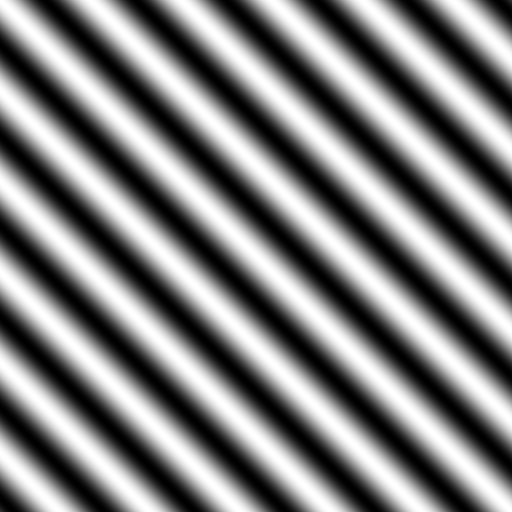</div>
The goal of this exercice is to study the limit conditions of sampling of this image in order to avoid aliasing.

In [1]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
# %matplotlib notebook 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Te, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Te-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Te-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()

1. We provide the function `sinusoid2d(A, theta, L, T0, Te)` that allows to sample signal $s_\theta$ with a sampling period of `Te` (the grid is regular with the sample sampling value for directions $u$ and $t$). Paremeters `A`, `theta`, `L` and `T0` respectively control the amplitude, orientation and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `Te=1`.


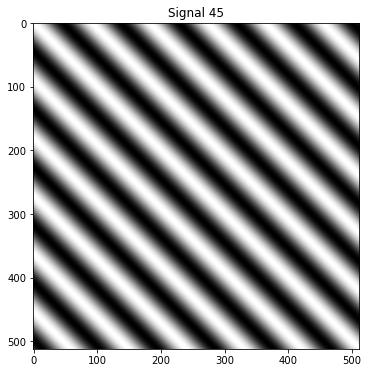

In [2]:
S45 = sinusoid2d(1, 45, 512, 64, 1)
imshow(S45, 'Signal 45')

2. (a) What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ can be used to derive the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

On a : $f_t^{\text{max}} = f_\text{0} * cos(\theta)$ et $f_u^{\text{max}} = f_\text{0} * sin(\theta)$ avec t vertical et u horizotal

Donc $f_m = max(f_\text{0} * cos(\theta), f_\text{0} * sin(\theta))$

facteur 1/2?



2. (b)  Sample $s_{45}$ with $f_e = 16 f_m$ and display the sampled signal.

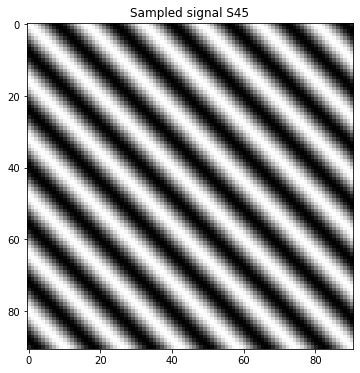

In [3]:
T0 = 64
theta = 45

# On sait que T = 1/F, donc F = 1/T
f0 = 1/T0
fm = max(f0*np.cos(np.radians(theta)), f0*np.sin(np.radians(theta)))
fe = 16*fm

Sampled_S45 = sinusoid2d(1, theta, 512, T0, 1/fe)
imshow(Sampled_S45, 'Sampled signal S45')

2. (c) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

/tmp/ipykernel_8992/1876184111.py:39: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


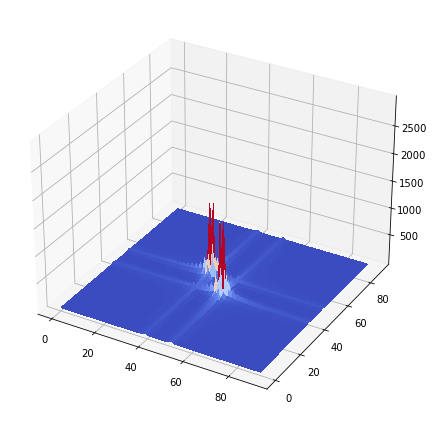

In [4]:
FT_S45 = fftshift(np.abs(fft2(Sampled_S45)))
surf(FT_S45)

2. (d) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_e$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of theses differences?
    - (Bonus question):
        - Why, aside the two Dirac peaks, there are somes structures? Explain the origin of these lobes.
        - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfer.

/tmp/ipykernel_8992/1876184111.py:39: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


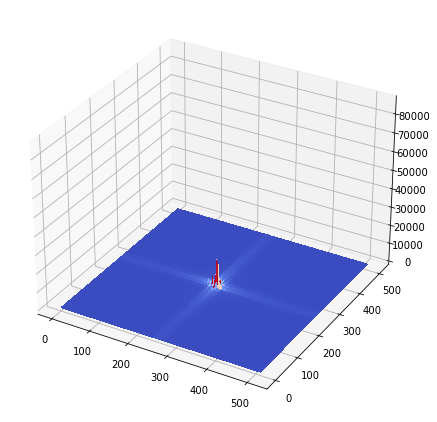

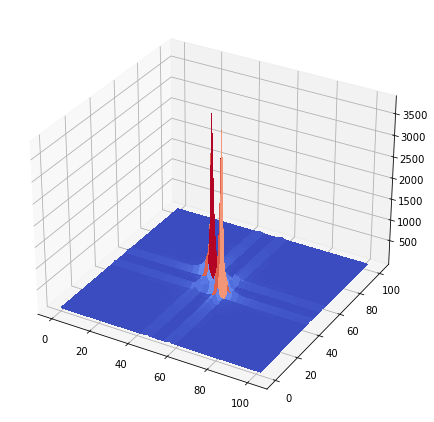

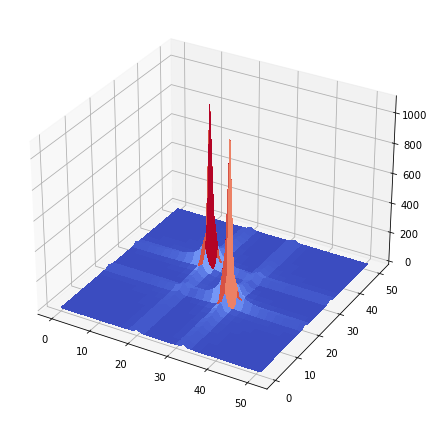

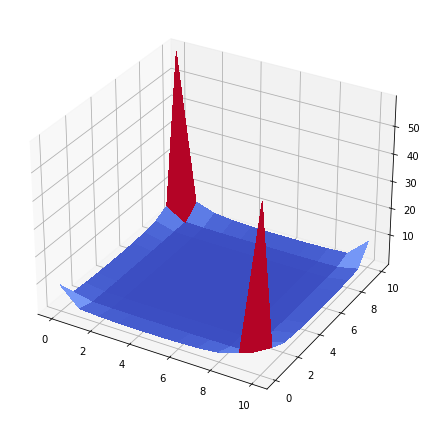

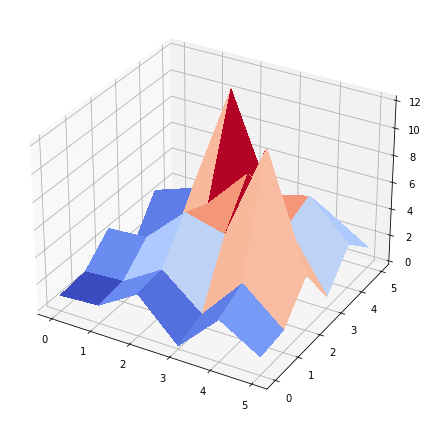

In [5]:
# On observe bien la présence de deux piques de Dirac.
# On fait varier la valeur de Te 
Te_values = [1,5,10,50,100]

for Te in Te_values:
    S45Sampled_tmp = sinusoid2d(1, 45, 512, 64, Te)
    surf(fftshift(np.abs(fft2(S45Sampled_tmp))))

La différence entre les spectres s'explique par la perte de précision due à l'échantillonnage: plus $T_e$ augmente, plus la frequence d'échantillonnage diminue.

La fonction de Dirac est une fonction théorique qui ne peut pas être représentée en pratique. Elle est donc approchée par un *sinc* d'où les lobes à côté des pics de Dirac.

T0 = 32


/tmp/ipykernel_8992/1876184111.py:39: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


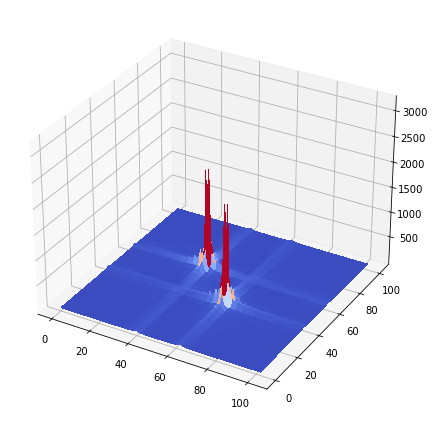

T0 = 64


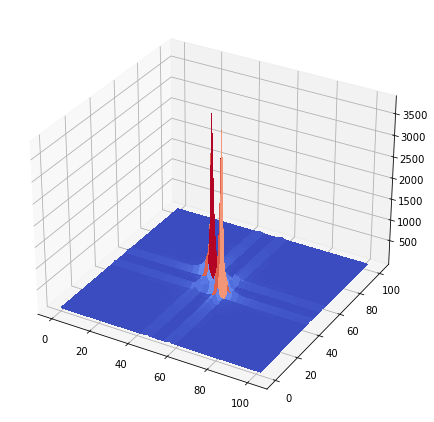

T0 = 128


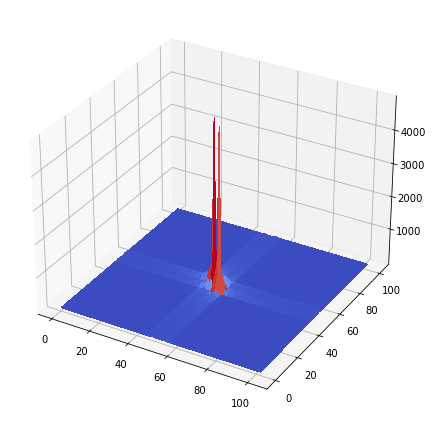

T0 = 256


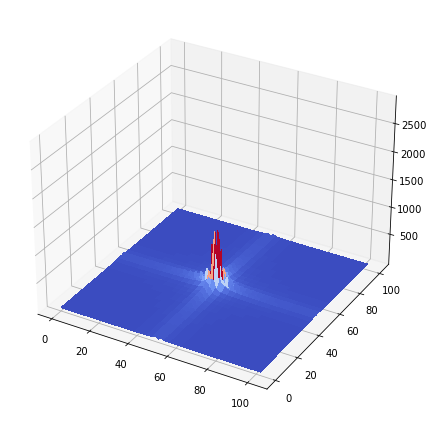

T0 = 512


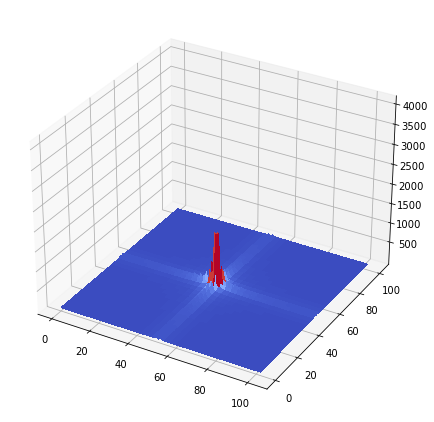

T0 = 1024


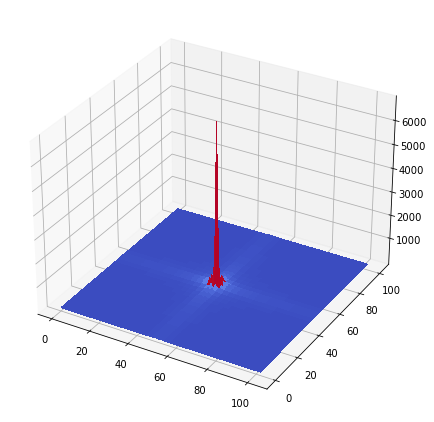

T0 = 2048


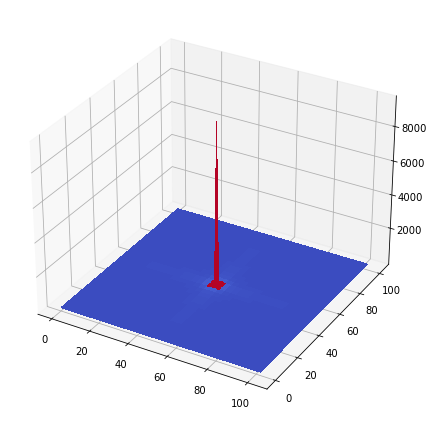

T0 = 4096


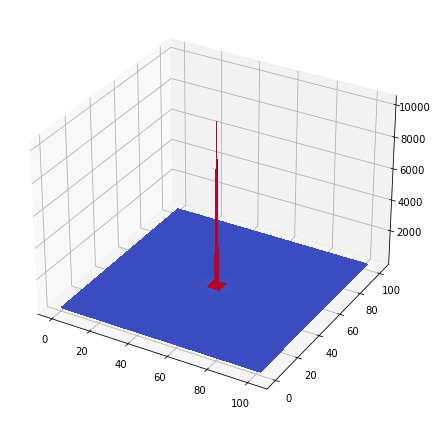

T0 = 8192


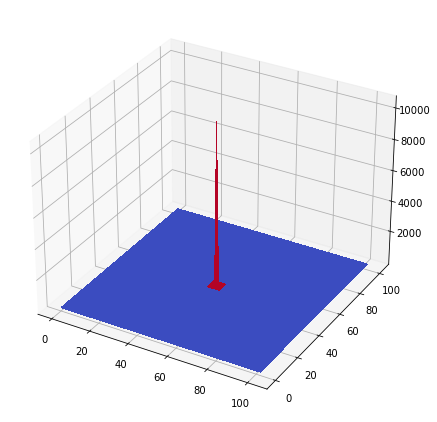

T0 = 16384


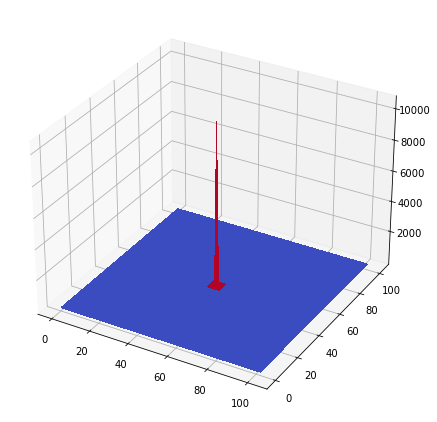

In [6]:
# Recherche de T0 pour la fusion des pics
T0_values = [2**i for i in range(5, 15)]
for T0 in T0_values:
    print("T0 =", T0)
    S45Sampled_tmp = sinusoid2d(1, 45, 512, T0, 5)
    surf(fftshift(np.abs(fft2(S45Sampled_tmp))))

Visuellement, on observe un début de fusion des pics de dirac aux alentours de $T_e = 256$.

3. (a) Sample $s_{45}$ with $f_e=4 f_m$ and display the sampled signal.

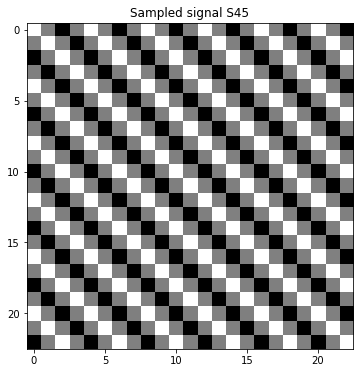

In [7]:
fe = 4*fm

Sampled_S45 = sinusoid2d(1, 45, 512, 64, 1/fe)
imshow(Sampled_S45, 'Sampled signal S45')

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [8]:
def error(A, Xr, Xd):
    L = Xr.shape[0]
    return 1/(2*A*L**2)*np.sum(np.abs(Xr - Xd))

3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

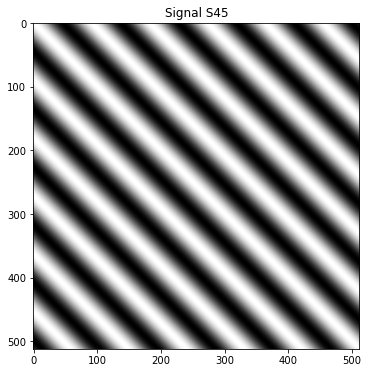

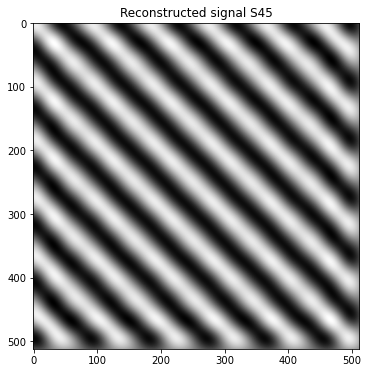

error = 0.022936924363103017


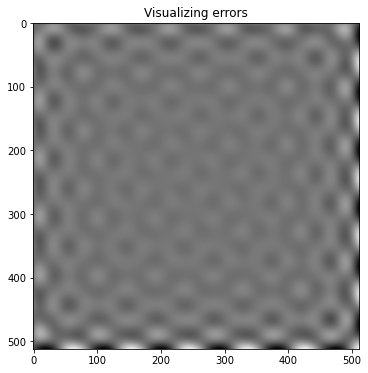

In [9]:
# original signal
imshow(S45, 'Signal S45')

# reconstructed signal
Reconstructed_S45 = shannonInterpolation(Sampled_S45, 1/fe, 512)
imshow(Reconstructed_S45, 'Reconstructed signal S45')

# relative average error
print("error =", error(1, S45, Reconstructed_S45))

# visualizing the differences
imshow(S45 - Reconstructed_S45, 'Visualizing errors')

4. Same question than 3. with $f_e = \frac32f_m$. Comment the effects of aliasing.

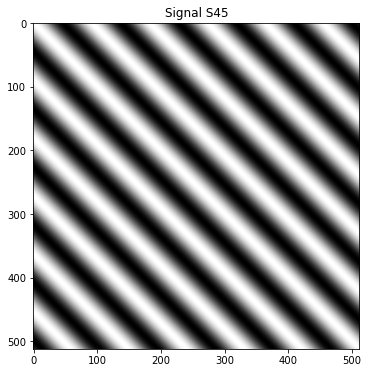

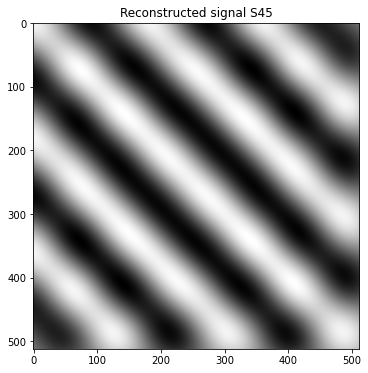

error = 0.40686264750145873


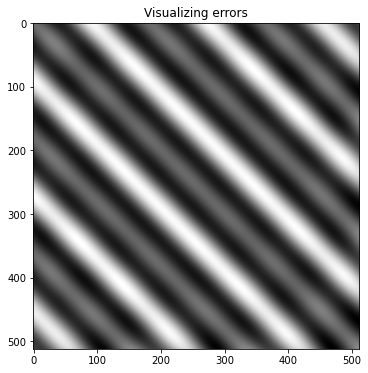

In [10]:
# original signal
imshow(S45, 'Signal S45')

# sampling
fe = (3/2)*fm
Sampled_S45 = sinusoid2d(1, 45, 512, 64, 1/fe)

# reconstructed signal
Reconstructed_S45 = shannonInterpolation(Sampled_S45, 1/fe, 512)
imshow(Reconstructed_S45, 'Reconstructed signal S45')

# relative average error
print("error =", error(1, S45, Reconstructed_S45))

# visualizing the differences
imshow(S45 - Reconstructed_S45, 'Visualizing errors')

Cet exemple montre bien l'effet de repliement de spectre (aliasing), avec $f_e = \frac32f_m$, on a l'impression que le signal reconstruit a des périodes deux fois plus grandes que le signal original.

5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_e$ what is the additional drawback appearing after the reconstruction? Explain.

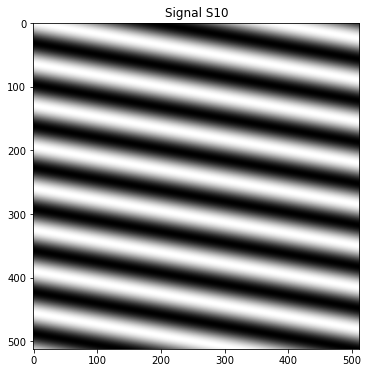

fm = 0.01538762114081575


In [11]:
T0 = 64
theta = 10

S10 = sinusoid2d(1, theta, 512, T0, 1)
imshow(S10, 'Signal S10')

f0 = 1/T0
fm = max(f0*np.cos(np.radians(theta)), f0*np.sin(np.radians(theta)))
print("fm =", fm)

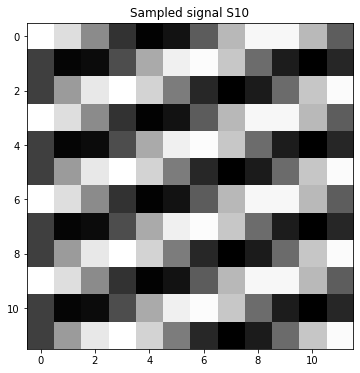

In [12]:
fe = (3/2)*fm

Sampled_S10 = sinusoid2d(1, theta, 512, T0, 1/fe)
imshow(Sampled_S10, "Sampled signal S10")

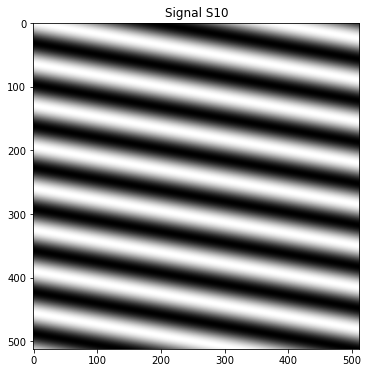

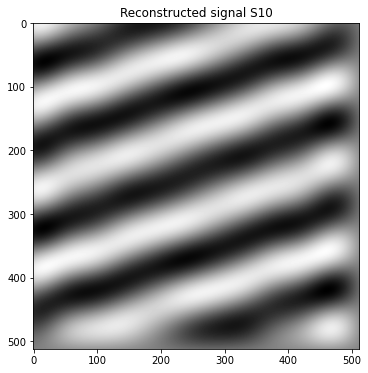

error = 0.3982390747439288


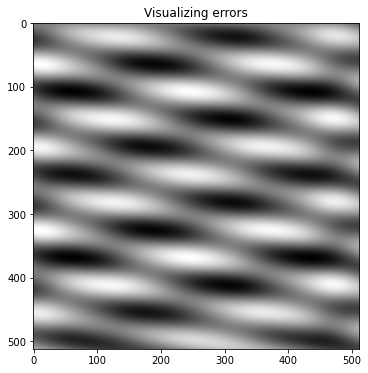

In [13]:
# original signal
imshow(S10, "Signal S10")

# reconstructed signal
Reconstructed_S10 = shannonInterpolation(Sampled_S10, 1/fe, 512)
imshow(Reconstructed_S10, "Reconstructed signal S10")

# relative average error
print("error =", error(1, S10, Reconstructed_S10))

# visualizing the differences
imshow(S10 - Reconstructed_S10, 'Visualizing errors')

En plus des effets indésirables mentionnés dans les réponses précédentes (période doublée...), ici on a même l'impression que le signal change de direction (comme si $\theta=-10°$).

6. Bonus question: write a function `shannonInterpolationLoop()` implementing equation (1) using two loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

In [14]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

### your code starts below


## Exercice 2: aliasing on natural images

In this exercice, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

In [15]:
from PIL import Image

barbara = np.array(Image.open('img/barbara.png'))

def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

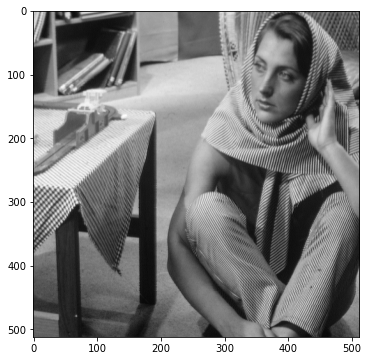

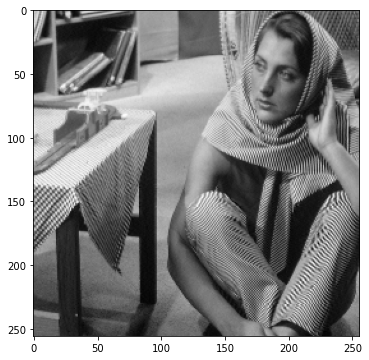

In [16]:
sub_barbara = subSample2(barbara)

imshow(barbara)
imshow(sub_barbara)

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

In [17]:
print('Le nombre de pixels avant échantillonage : ', barbara.shape[0]**2)
print('Le nombre de pixels après échantillonage : ',sub_barbara.shape[0]**2)
print('Le nombre de pixels a été diminué de ', ((barbara.shape[0]**2 - sub_barbara.shape[0]**2)/barbara.shape[0]**2)*100, '%')

Le nombre de pixels avant échantillonage :  262144
Le nombre de pixels après échantillonage :  65536
Le nombre de pixels a été diminué de  75.0 %


In [18]:
print(barbara[:4, :4])
print(sub_barbara[:2, :2])
# On peut observer que image sous-échantionnée prend 1 pixel sur 4, ce qui vérifie la perte de 75% de pixels.

[[181 201 202 195]
 [171 198 201 192]
 [175 195 193 183]
 [184 201 192 180]]
[[181 202]
 [175 193]]


La fonction `subSample2` de facteur 2 permet donc de réduire la taille de l'image par deux sur les abscisses et les ordonnées, c'est-à-dire que le nombre de pixels a été divisé par 2^2=4. Si on faisait la même fonction de facteur 3, alors on aurait divisé le nombre pixels par 3^2 = 9. 

On remarque des effets indésirables notamment sur les motifs du pantalon ou encore sur ceux de la nappe.<br>
Ces effets viennent du fait qu'on a gardé qu'une partie des pixels, donc la résolution de l'image a fortement diminué. <br>
On peut l'assimiler à une même image (1920x1080 pixels) sur deux écrans A et B de résolution différente (240p et 1080p), l'affichage sur l'écran A de 240p aura forcément des pertes, car la taille de l'image originale est plus grande que la résolution de cet écran A, donc à l'affichage, on affichera seulement une partie des pixels de l'image originale (dépend de comme l'écran traite les images de haute résolution), ainsi, on pourrait avoir un effet similaire à celui qu'on rencontre dans la question précédente. Tandis que sur l'écran B, on pourrait afficher l'intégralité de l'image sans perte de pixel.

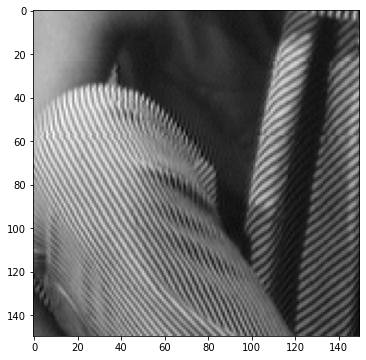

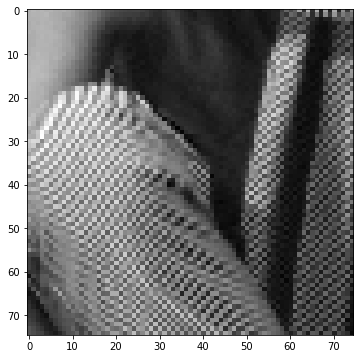

In [19]:
# zoom sur les effets indésirables sur les motifs du pantalon
pantalon = barbara[250:400, 250:400]
imshow(pantalon)

sub_pantalon = subSample2(pantalon)
imshow(sub_pantalon)

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

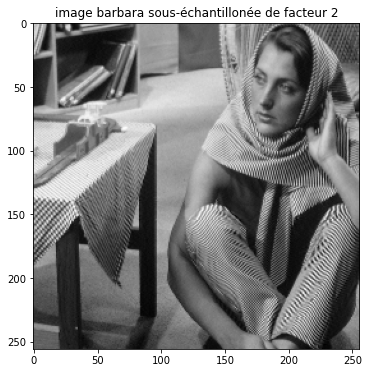

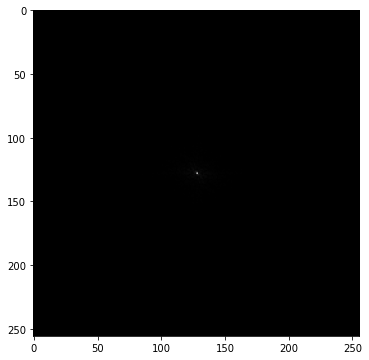

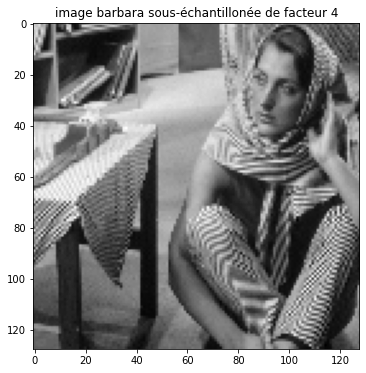

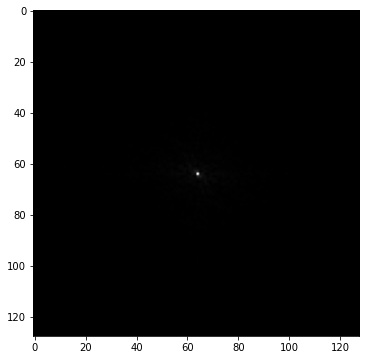

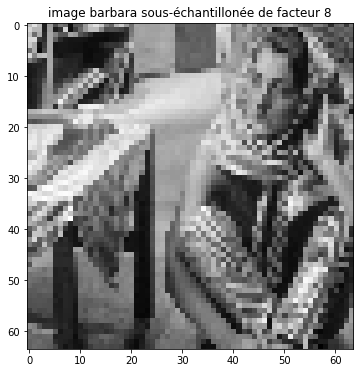

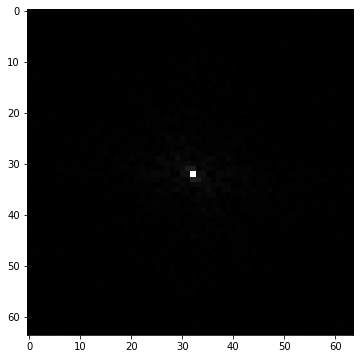

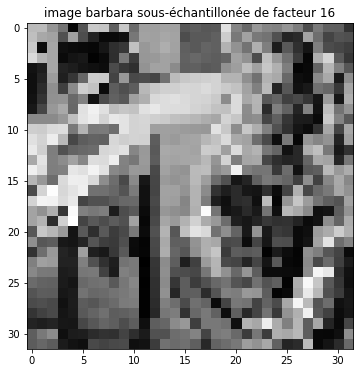

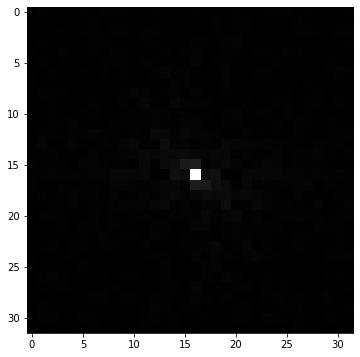

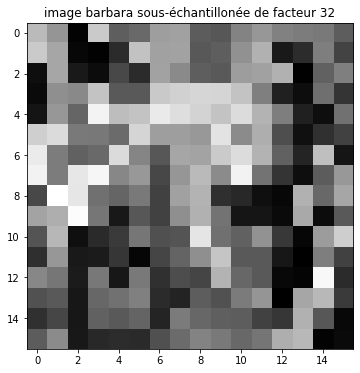

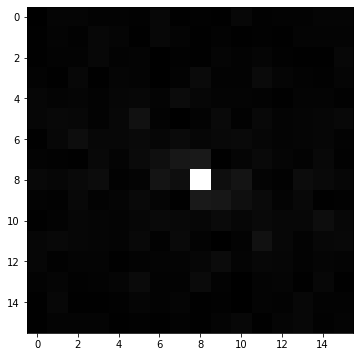

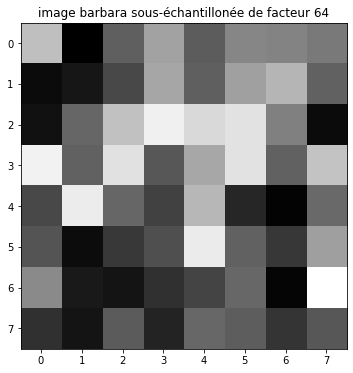

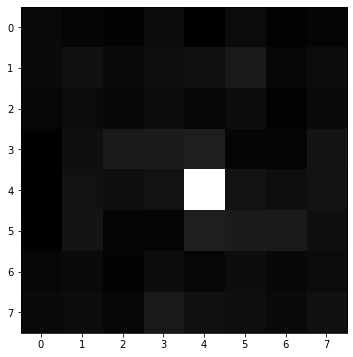

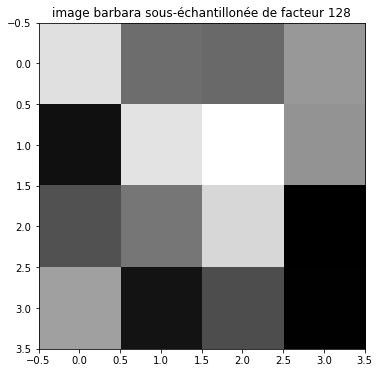

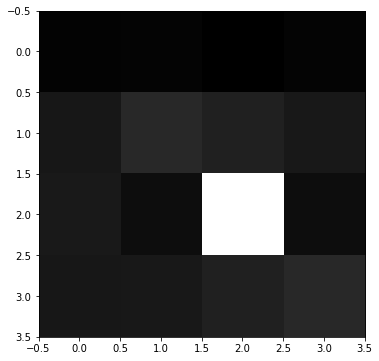

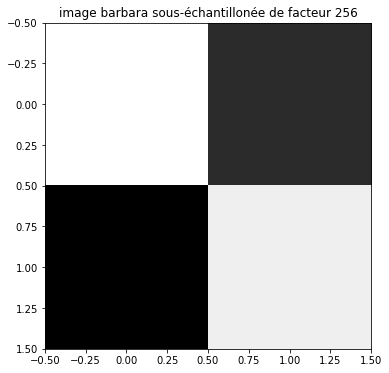

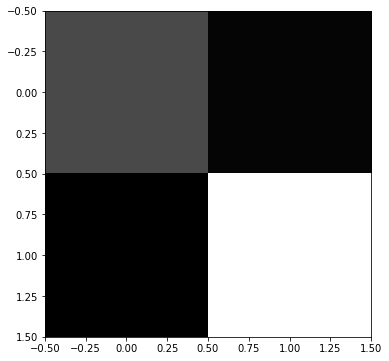

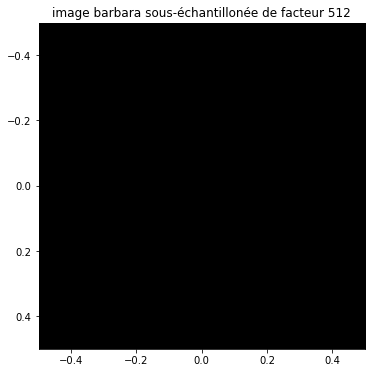

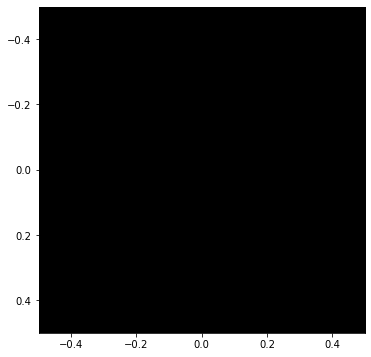

In [20]:
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return fftshift(np.abs(If))

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return fftshift(np.log(1+np.abs(If)))
    
def subSample(I, factor):
    """ Array -> Array """
    return I[::factor, ::factor]
    
img = barbara
for i in range(1,10):
    img = subSample(img, 2)
    imshow(img, 'image barbara sous-échantillonée de facteur %d' % 2**i)
    imshow(toVisualizeFT(computeFT(img)))
    

3. Bonus question: same question with the image `img/mandrill.png`.

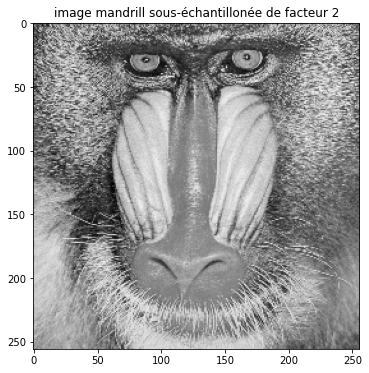

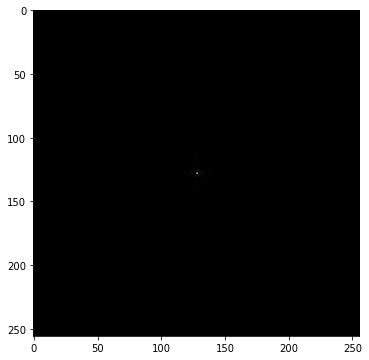

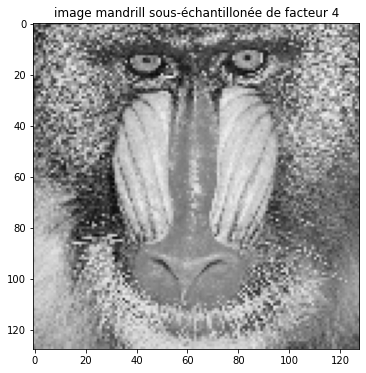

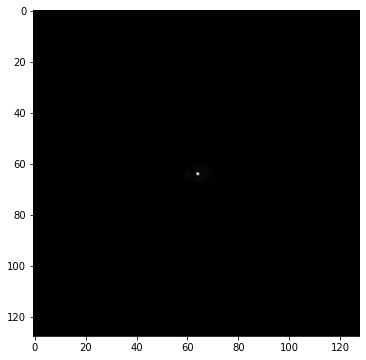

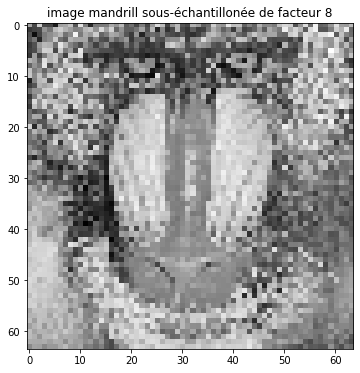

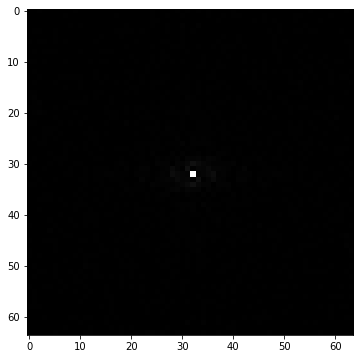

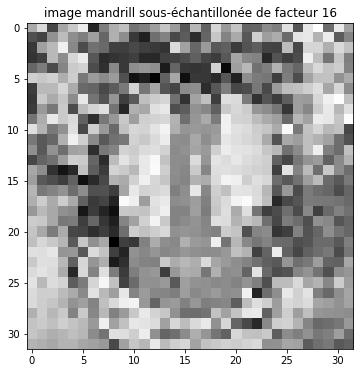

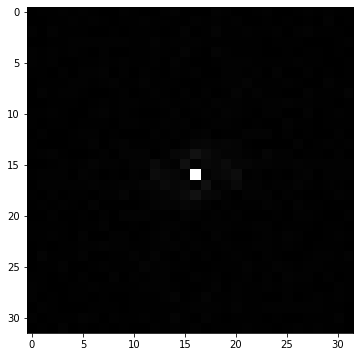

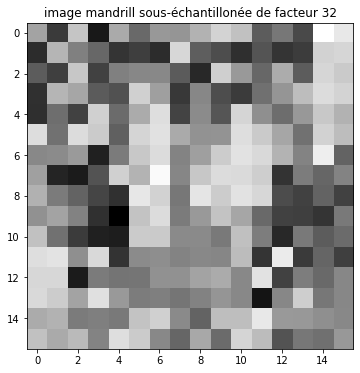

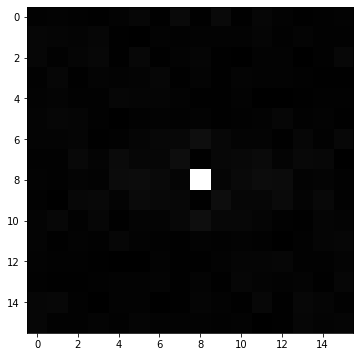

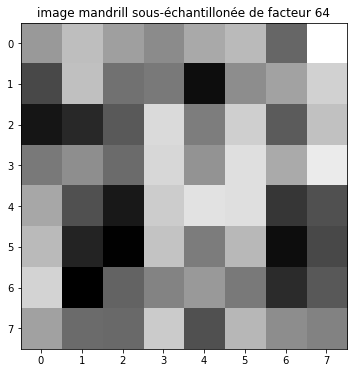

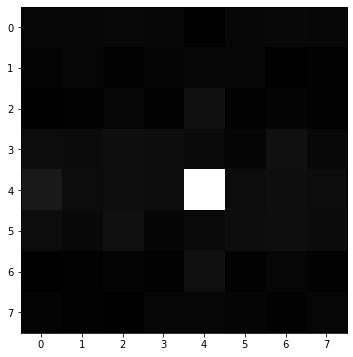

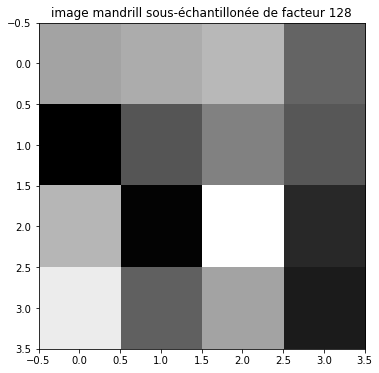

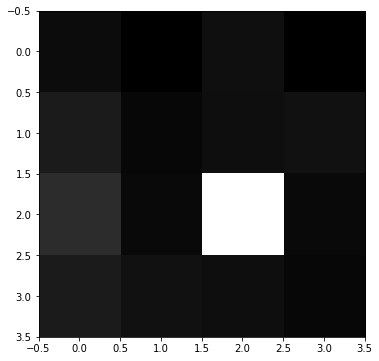

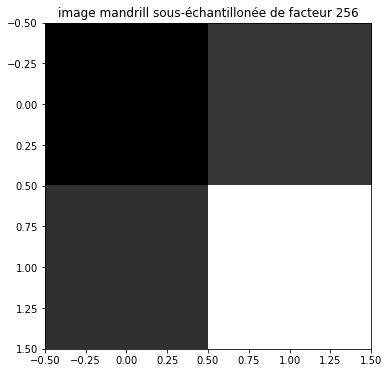

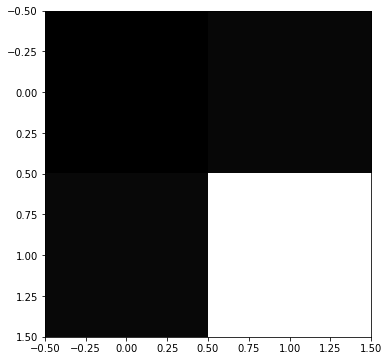

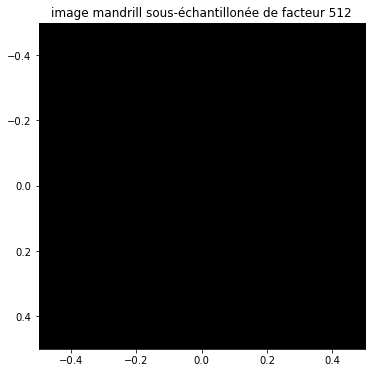

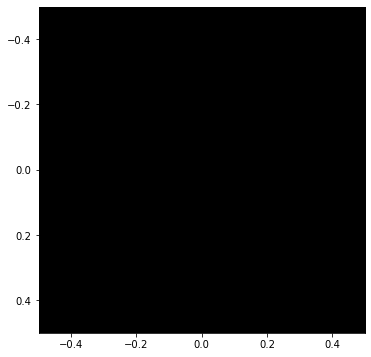

In [21]:
mandrill = np.array(Image.open('img/mandrill.png'))
### your code and comments start below

img = mandrill
for i in range(1,10):
    img = subSample(img, 2)
    imshow(img, 'image mandrill sous-échantillonée de facteur %d' % 2**i)
    imshow(toVisualizeFT(computeFT(img)))